In [18]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, roc_curve, roc_auc_score 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
# keras
from tensorflow import keras
from tensorflow.keras import layers

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)
from random import randint

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [19]:
X = np.load("smiley_X.npy")
y = np.load("smiley_y.npy")
print(X.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(x_train.shape)
print(y_train.shape)

(144, 9, 9, 1)
(144,)
(108, 9, 9, 1)
(108,)


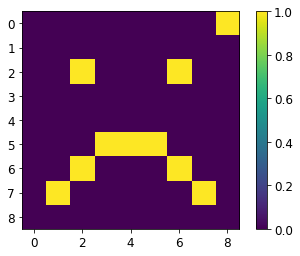

In [20]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(9,9,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(5, activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 7, 7, 32)          320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 1, 64)          18496     
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 256)               16640     
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                      

In [43]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 3ms/step - loss: 0.3692 - accuracy: 0.9167
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9815
Epoch 3/5
4/4 [==============================] - 0s 3ms/step - loss: 0.1789 - accuracy: 0.9259
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.9444
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 1.0000


In [44]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [45]:
classifications = model.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [46]:
print(classifications[3])

[7.9524535e-01 2.0424889e-01 2.1934467e-04 2.1372069e-04 7.2741997e-05]


In [47]:
np.argmax(classifications[3])

0

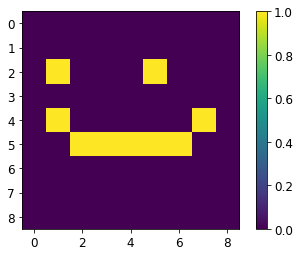

In [48]:
plt.imshow(x_test[3].reshape(9,9))
plt.colorbar()
plt.grid(False)

1/1 [==============================] - 0s 18ms/step


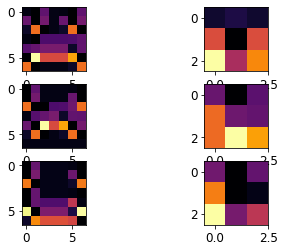

In [50]:
f, axarr = plt.subplots(3,2)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

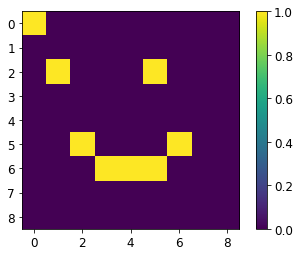

In [40]:
plt.imshow(x_train[FIRST_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)

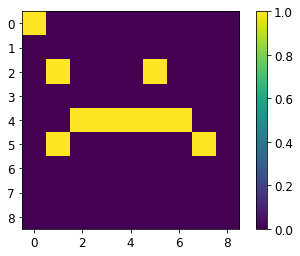

In [41]:
plt.imshow(x_train[THIRD_IMAGE].reshape(9,9))
plt.colorbar()
plt.grid(False)